In [4]:
from astropy.coordinates import SkyCoord, EarthLocation, AltAz

import astropy.time
from astropy import units as u

import numpy as np


In [124]:
400*.7

280.0

# Junk

In [242]:
ls = np.arange(0, 360+1, 2)
bs = np.arange(-20, 20+1, 4)
best_start = []
hr = 7
day = 16
time = astropy.time.Time(f'2020-4-{day} {hr}:00')
Leusch = EarthLocation(lat=37.91934, lon=122.15385, height=304*u.m)

observing_time = astropy.time.Time(time)
aa = AltAz(location=Leusch, obstime=observing_time)

grid = np.zeros((len(ls), len(bs), 2))
grid_lb = grid.copy()

counter = 0
for i, l in enumerate(ls):
    for j,b in enumerate(bs):
        if counter%4 !=0:
            b = -b
        grid_lb[i, j] = l,b                                                  # Store the l and bs in thier own array for easy viewing
        c = SkyCoord(l, b, frame='galactic',unit='deg')   
        ra_dec = c.transform_to('fk5')                                       # convert the l,b to ra, dec and store in grid
        grid[i,j,0]  = ra_dec.ra.radian
        grid[i, j, 1] = ra_dec.dec.radian
        
        
        # We want to find a starting coordinate that is close to the horizon and moving up
    
#         a = c.transform_to(aa)                                               # convert to ant az
#         if a.alt.radian*180/np.pi >10 and a.alt.radian*180/np.pi < 11:       # find the indices that are near horizon to begin with

#             # Find the altitudes at a later time to find which have come over head
#             new_time = astropy.time.Time(f'2020-4-{day} {hr+1}:00')                   
#             new_aa = AltAz(location=Leusch, obstime=new_time)                
#             new_a = c.transform_to(new_aa)
#             if new_a.alt.radian*180/np.pi > a.alt.radian*180/np.pi and j==0:
#                 # Append those coordinates to a list
#                 best_start.append((i,j))
    
    counter +=1
        

In [243]:
def start_generator(grid, start_l, start_b):
    for idx_l in range(grid.shape[0]):
        for idx_b in range(grid.shape[1]):
            yield  grid[(idx_l + start_l) % grid.shape[0], (idx_b+start_b)%grid.shape[1], :]

    

In [257]:
a = 'a'
b = a +f'{3}_{7}'

In [258]:
b

'a3_7'

In [245]:
g = start_generator(grid, int(116), 0)
g_lb = start_generator(grid_lb, int(116), 0)
pointings = np.array([coord for coord in g])
pointings_lb = np.array([coord for coord in g_lb])

In [246]:
import matplotlib.pyplot as plt
%matplotlib notebook

In [247]:
pointings[0]

array([ 1.6121883 , -0.44357659])

In [248]:
for point in pointings_lb:
    print(point)

[232. -20.]
[232. -16.]
[232. -12.]
[232.  -8.]
[232.  -4.]
[232.   0.]
[232.   4.]
[232.   8.]
[232.  12.]
[232.  16.]
[232.  20.]
[234.  20.]
[234.  16.]
[234.  12.]
[234.   8.]
[234.   4.]
[234.   0.]
[234.  -4.]
[234.  -8.]
[234. -12.]
[234. -16.]
[234. -20.]
[236.  20.]
[236.  16.]
[236.  12.]
[236.   8.]
[236.   4.]
[236.   0.]
[236.  -4.]
[236.  -8.]
[236. -12.]
[236. -16.]
[236. -20.]
[238.  20.]
[238.  16.]
[238.  12.]
[238.   8.]
[238.   4.]
[238.   0.]
[238.  -4.]
[238.  -8.]
[238. -12.]
[238. -16.]
[238. -20.]
[240. -20.]
[240. -16.]
[240. -12.]
[240.  -8.]
[240.  -4.]
[240.   0.]
[240.   4.]
[240.   8.]
[240.  12.]
[240.  16.]
[240.  20.]
[242.  20.]
[242.  16.]
[242.  12.]
[242.   8.]
[242.   4.]
[242.   0.]
[242.  -4.]
[242.  -8.]
[242. -12.]
[242. -16.]
[242. -20.]
[244.  20.]
[244.  16.]
[244.  12.]
[244.   8.]
[244.   4.]
[244.   0.]
[244.  -4.]
[244.  -8.]
[244. -12.]
[244. -16.]
[244. -20.]
[246.  20.]
[246.  16.]
[246.  12.]
[246.   8.]
[246.   4.]
[246.   0.]
[246

[46.  0.]
[46. -4.]
[46. -8.]
[ 46. -12.]
[ 46. -16.]
[ 46. -20.]
[ 48. -20.]
[ 48. -16.]
[ 48. -12.]
[48. -8.]
[48. -4.]
[48.  0.]
[48.  4.]
[48.  8.]
[48. 12.]
[48. 16.]
[48. 20.]
[50. 20.]
[50. 16.]
[50. 12.]
[50.  8.]
[50.  4.]
[50.  0.]
[50. -4.]
[50. -8.]
[ 50. -12.]
[ 50. -16.]
[ 50. -20.]
[52. 20.]
[52. 16.]
[52. 12.]
[52.  8.]
[52.  4.]
[52.  0.]
[52. -4.]
[52. -8.]
[ 52. -12.]
[ 52. -16.]
[ 52. -20.]
[54. 20.]
[54. 16.]
[54. 12.]
[54.  8.]
[54.  4.]
[54.  0.]
[54. -4.]
[54. -8.]
[ 54. -12.]
[ 54. -16.]
[ 54. -20.]
[ 56. -20.]
[ 56. -16.]
[ 56. -12.]
[56. -8.]
[56. -4.]
[56.  0.]
[56.  4.]
[56.  8.]
[56. 12.]
[56. 16.]
[56. 20.]
[58. 20.]
[58. 16.]
[58. 12.]
[58.  8.]
[58.  4.]
[58.  0.]
[58. -4.]
[58. -8.]
[ 58. -12.]
[ 58. -16.]
[ 58. -20.]
[60. 20.]
[60. 16.]
[60. 12.]
[60.  8.]
[60.  4.]
[60.  0.]
[60. -4.]
[60. -8.]
[ 60. -12.]
[ 60. -16.]
[ 60. -20.]
[62. 20.]
[62. 16.]
[62. 12.]
[62.  8.]
[62.  4.]
[62.  0.]
[62. -4.]
[62. -8.]
[ 62. -12.]
[ 62. -16.]
[ 62. -20.]
[ 64. 

[212.   0.]
[212.  -4.]
[212.  -8.]
[212. -12.]
[212. -16.]
[212. -20.]
[214.  20.]
[214.  16.]
[214.  12.]
[214.   8.]
[214.   4.]
[214.   0.]
[214.  -4.]
[214.  -8.]
[214. -12.]
[214. -16.]
[214. -20.]
[216. -20.]
[216. -16.]
[216. -12.]
[216.  -8.]
[216.  -4.]
[216.   0.]
[216.   4.]
[216.   8.]
[216.  12.]
[216.  16.]
[216.  20.]
[218.  20.]
[218.  16.]
[218.  12.]
[218.   8.]
[218.   4.]
[218.   0.]
[218.  -4.]
[218.  -8.]
[218. -12.]
[218. -16.]
[218. -20.]
[220.  20.]
[220.  16.]
[220.  12.]
[220.   8.]
[220.   4.]
[220.   0.]
[220.  -4.]
[220.  -8.]
[220. -12.]
[220. -16.]
[220. -20.]
[222.  20.]
[222.  16.]
[222.  12.]
[222.   8.]
[222.   4.]
[222.   0.]
[222.  -4.]
[222.  -8.]
[222. -12.]
[222. -16.]
[222. -20.]
[224. -20.]
[224. -16.]
[224. -12.]
[224.  -8.]
[224.  -4.]
[224.   0.]
[224.   4.]
[224.   8.]
[224.  12.]
[224.  16.]
[224.  20.]
[226.  20.]
[226.  16.]
[226.  12.]
[226.   8.]
[226.   4.]
[226.   0.]
[226.  -4.]
[226.  -8.]
[226. -12.]
[226. -16.]
[226. -20.]
[228

In [249]:
for coord in pointings:
    if coord[1]*180/np.pi <-40:
        del coord

In [250]:
pointings

array([[ 1.6121883 , -0.44357659],
       [ 1.6833051 , -0.41716961],
       [ 1.75272126, -0.38893398],
       ...,
       [ 1.73741359, -0.35790694],
       [ 1.66895543, -0.38632355],
       [ 1.59894468, -0.41306749]])

<IPython.core.display.Javascript object>


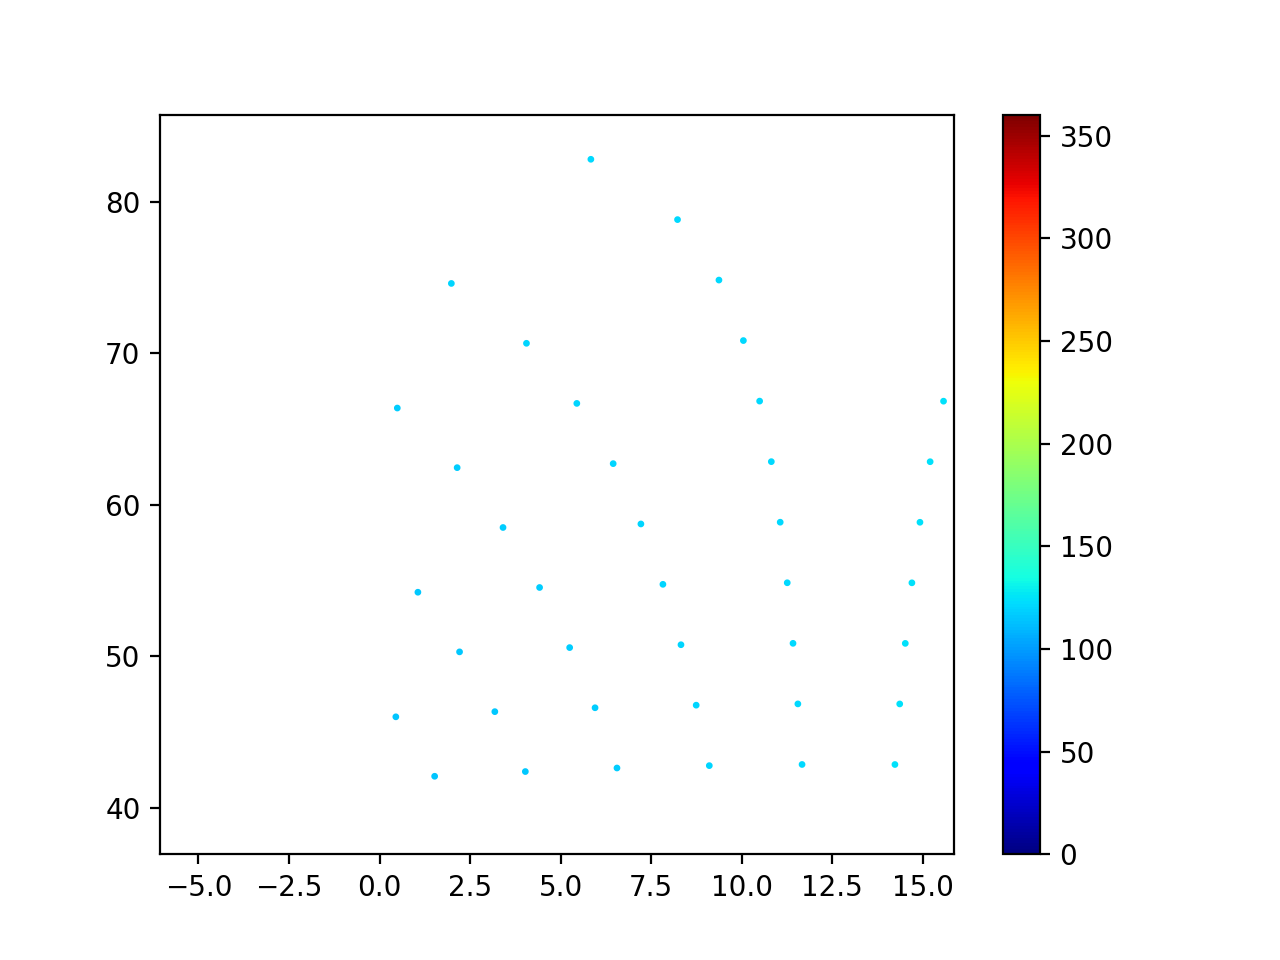

In [255]:
plt.figure()
plt.scatter(pointings[:,0]*180/np.pi,pointings[:,1]*180/np.pi , s=2, c=pointings_lb[:,0], cmap='jet')
plt.axhline(-40, c='k')
plt.colorbar()

In [217]:
pointings_altaz = pointings.copy()

<IPython.core.display.Javascript object>


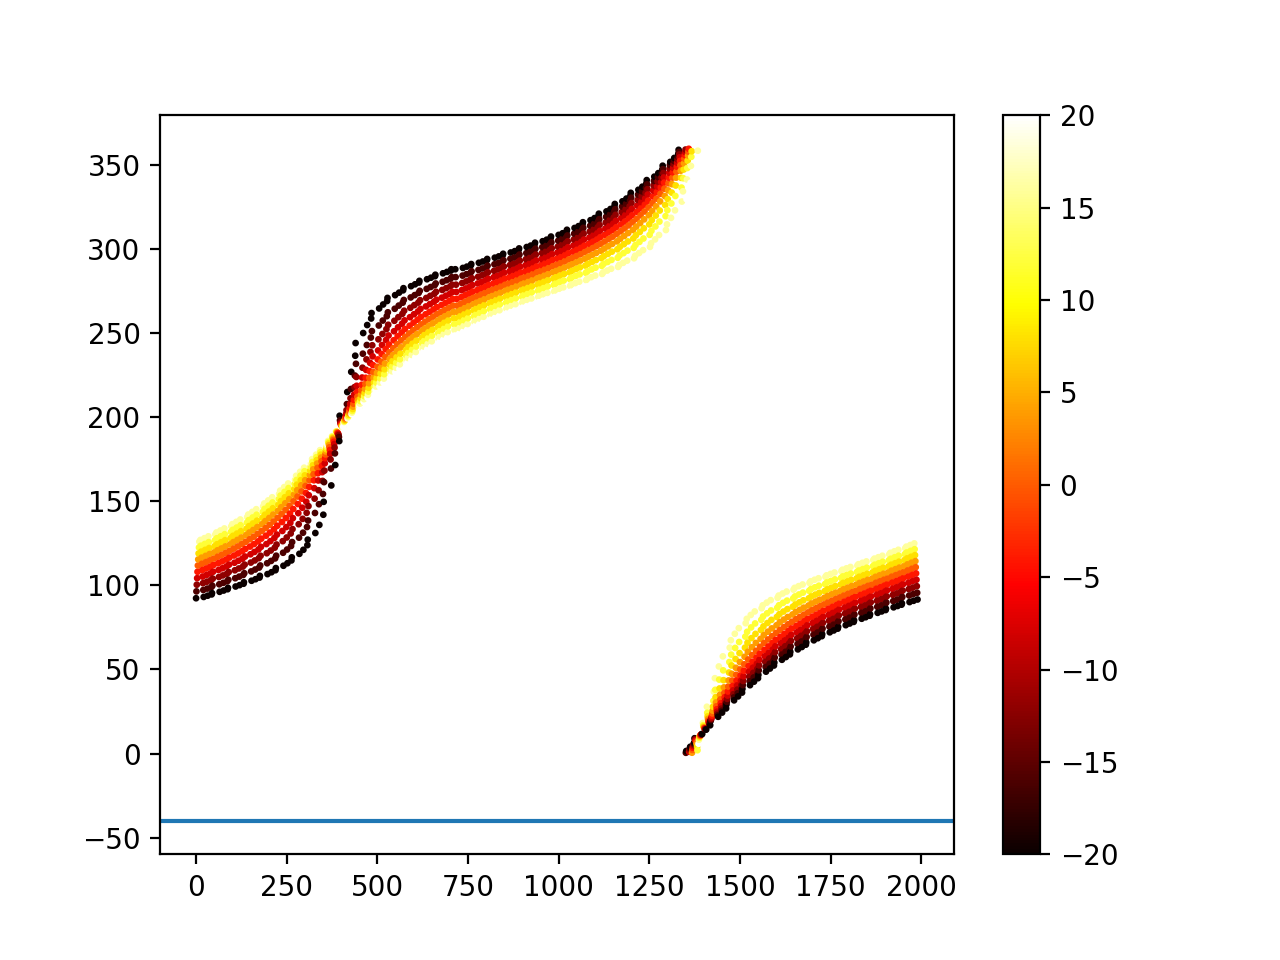

In [187]:
plt.figure()
plt.scatter(np.arange(len(pointings)),pointings[:,0]*180/np.pi , s=2, c=pointings_lb[:,1], cmap='hot')
plt.axhline(-40)
plt.colorbar()